## 1 - Perkenalan

>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama: Hana

Batch: FTDS -

Objective: Menurut laporan FIFA 2022 (.....), jumlah pemain sepak bola pada tahun 2021 kurang lebih sebanyak 100.000 pemain. Namun, dalam dataset ini yang digunakan hanya mencakup 20.000 pemain saja. Project kali ini bertujuan untuk memprediksi rating pemain FIFA 2023 sehingga semua pemain sepak bola profesional dapat diketahui ratingnya dan tidak menutup kemungkinan akan lahir wonderkid/talenta baru. Project akan dibuat menggunakan algoritma Linear Regression dan metric MAE akan dipertimbangkan.

## 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [3]:
#Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import sklearn
print(sklearn.__version__)

1.5.2


## 3 - Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [6]:
#Duplicate Dataset

data_duplicate = data.copy()

In [7]:
#Rename columns (ga wajib)

data.rename(columns = {'ValueEUR' : 'Price', 'Overall' : 'Rating'}, inplace = True)
data

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


- Pada dataset ini terdapat 14 kolom dengan masing-masing data terdiri dari 3 kolom bertipe object dan 10 kolom bertipe integer
- Tidak terlihat adanya missing value dari data entries pada masing-masing fitur

In [9]:
#check dataset - 2

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19260.0,2.518468e+01,4.737340e+00,16.0,21.0,25.0,29.0,54.0
Height,19260.0,1.813050e+02,6.866151e+00,155.0,176.0,181.0,186.0,206.0
Weight,19260.0,7.495078e+01,7.066864e+00,49.0,70.0,75.0,80.0,110.0
Price,19260.0,2.857652e+06,7.604532e+06,0.0,475000.0,975000.0,2000000.0,194000000.0
PaceTotal,19260.0,6.791023e+01,1.065645e+01,28.0,62.0,68.0,75.0,97.0
ShootingTotal,19260.0,5.353551e+01,1.381348e+01,18.0,44.0,56.0,64.0,94.0
PassingTotal,19260.0,5.785332e+01,9.835494e+00,25.0,52.0,58.0,65.0,93.0
DribblingTotal,19260.0,6.302871e+01,9.704853e+00,26.0,58.0,64.0,69.0,95.0
DefendingTotal,19260.0,5.005810e+01,1.638880e+01,14.0,35.0,54.0,63.0,91.0
PhysicalityTotal,19260.0,6.467658e+01,9.626269e+00,29.0,58.0,66.0,72.0,92.0


- Menurut jurnal bla bla, tinggi rata-rata orang asia adalah 170-175cm, dilihat dari data statistik sederhana yang dilakukan, dataset ini memiliki rata-rata tingi sebesar 181cm, yang artinya bisa dibilang untuk datase† sedikit sekali pemain dari asia.
- rata-rata harga pemain jauh dari maksimum harga pemain, artinya kemungkinan terdistribusi skew, sehingga akan dilakukan pengecekan lebih lanjut.

## 4 - Exploratory Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

GC & Milestone Minimal 5-7

LC minimal 2 (yang ada di soal)

Akan dilihat persebaran rating pada dataset dan proporsi antara berat dan tinggi badan pemain.

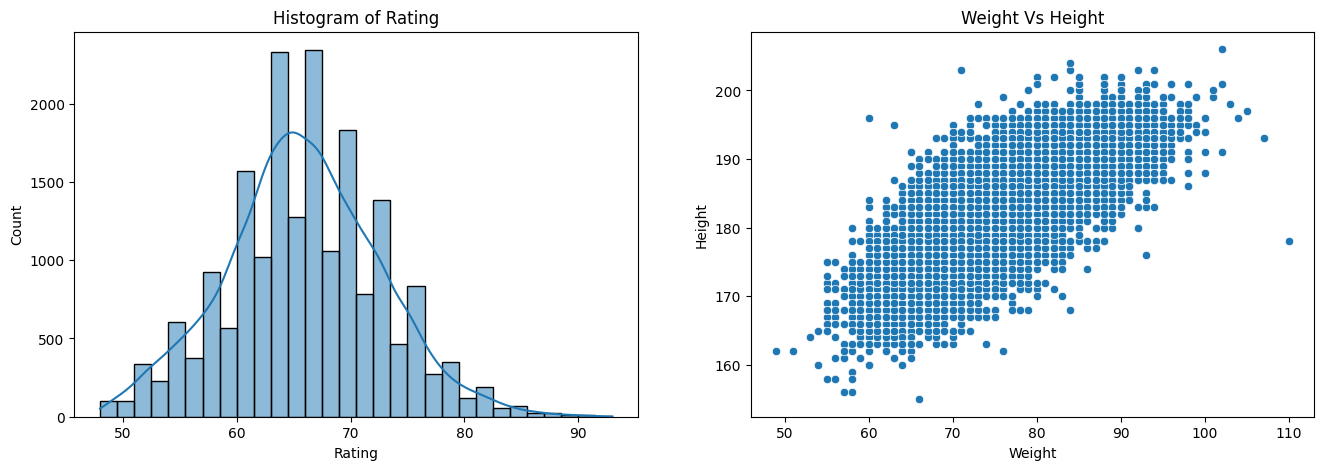

In [10]:
# Create Histogram and Scatter plot

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(data['Rating'], kde = True, bins = 30)
plt.title('Histogram of Rating')

plt.subplot(1,2,2)
sns.scatterplot(x = 'Weight', y = 'Height', data= data)
plt.title('Weight Vs Height')
plt.show()

Statement ??

- Terlihat dari plot histogram, Rating terdistribusi normal, rata - rata sekitar 65.
- Tinggi dan Berat badan pemain cukup proporsional, terlihat dari berat dan tinggi pemain seimbang.

## 5 - Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Handling Cardinality


#### Split between X (Features) and y (target)

In [11]:
#Splitting between 'X' and 'y'

X = data.drop(['Rating'], axis = 1)
y = data['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


### Splitting between Train-Set and Test-set

In [12]:
#Splitting between train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (15408, 13)
Test Size:  (3852, 13)


### Handling Outlier

> Akan dijelaskan pada materi Feature Engineering

### Handling Missing Value


In [13]:
X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [14]:
X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [15]:
y_train.isnull().sum()

np.int64(0)

In [16]:
y_test.isnull().sum()

np.int64(0)

Data tidak memiliki missing value, sehingga proses feature engineering bisa dilanjutkan ke tahapan encoding dan scaling

### Split Between Numeric Columns and Categorical Columns


In [17]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical Columns:  ['Name', 'AttackingWorkRate', 'DefensiveWorkRate']


In [18]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
4815,27,177,73,1700000,73,56,59,68,65,76
1070,31,188,77,7000000,51,47,59,56,79,76
14100,26,186,75,475000,61,49,56,61,59,66
7255,29,193,85,1000000,68,66,69,70,46,65
7146,27,193,75,1400000,63,34,56,62,67,67
...,...,...,...,...,...,...,...,...,...,...
11532,22,185,71,1300000,66,61,45,64,29,68
16065,24,185,76,350000,66,56,53,62,49,66
14501,19,193,70,750000,61,26,47,46,60,61
14555,17,164,59,775000,62,32,47,55,57,44


### Feature Selection


---

feature selection bisa dilakukan dimanapun asal diperhatikan apakah menggunakan fit atau tidak, kalo pake fit wajib setelah split


- pearson, spearman, anova, chi square (Hypothesis Testing)
- Feature importance (Based Tree Algorithm )

In [19]:
X_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
4815,Brian Oliván,27,177,73,1700000,High,Medium,73,56,59,68,65,76
1070,C. Dawson,31,188,77,7000000,Low,Medium,51,47,59,56,79,76
14100,K. Wallace,26,186,75,475000,Medium,Medium,61,49,56,61,59,66
7255,Victor Braga,29,193,85,1000000,Medium,Medium,68,66,69,70,46,65
7146,J. van Aken,27,193,75,1400000,Medium,High,63,34,56,62,67,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,T. Sandoval,22,185,71,1300000,High,Medium,66,61,45,64,29,68
16065,A. Södlund,24,185,76,350000,High,High,66,56,53,62,49,66
14501,J. Bagan,19,193,70,750000,Medium,Medium,61,26,47,46,60,61
14555,R. Di Luciano,17,164,59,775000,High,Medium,62,32,47,55,57,44


Berdasarkan personal judgment, tidak kaitannya nama dengan rating pemain sepak bola. Hal in dibuktikan dengan nama Fajar Ronaldo tidak ada kaitannya dengan nama sehebat Christiano Ronaldo sehingga ratingnya pun akan berbeda.

In [20]:
#Drop column 'Name'
X_train_cat.drop('Name', axis = 1, inplace = True)
X_test_cat.drop('Name', axis = 1, inplace = True)
X_train_cat

C:\Users\MSI\AppData\Local\Temp\ipykernel_19152\3769032576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop('Name', axis = 1, inplace = True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19152\3769032576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop('Name', axis = 1, inplace = True)


,AttackingWorkRate,DefensiveWorkRate
4815,High,Medium
1070,Low,Medium
14100,Medium,Medium
7255,Medium,Medium
7146,Medium,High
...,...,...
11532,High,Medium
16065,High,High
14501,Medium,Medium
14555,High,Medium


In [21]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_num.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Cat Columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


### Feature Scaling

In [22]:
#Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.28947368, 0.43137255, 0.39344262, ..., 0.60869565, 0.66233766,
        0.7704918 ],
       [0.39473684, 0.64705882, 0.45901639, ..., 0.43478261, 0.84415584,
        0.7704918 ],
       [0.26315789, 0.60784314, 0.42622951, ..., 0.50724638, 0.58441558,
        0.60655738],
       ...,
       [0.07894737, 0.74509804, 0.3442623 , ..., 0.28985507, 0.5974026 ,
        0.52459016],
       [0.02631579, 0.17647059, 0.16393443, ..., 0.42028986, 0.55844156,
        0.24590164],
       [0.15789474, 0.56862745, 0.47540984, ..., 0.60869565, 0.16883117,
        0.57377049]])

### Feature Encoding

Jelaskan alasan pemilihan teknik encoding

In [23]:
X_train_cat

,AttackingWorkRate,DefensiveWorkRate
4815,High,Medium
1070,Low,Medium
14100,Medium,Medium
7255,Medium,Medium
7146,Medium,High
...,...,...
11532,High,Medium
16065,High,High
14501,Medium,Medium
14555,High,Medium


In [24]:
#Feature Encoding using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories = [['Low', 'Medium', 'High'],
                                      ['Low', 'Medium', 'High']])
encoder.fit(X_train_cat)

OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                           ['Low', 'Medium', 'High']])

In [25]:
X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[2., 1.],
       [0., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [2., 1.],
       [2., 0.]])

### Concate between Numeric Columns and Categorical Columns

In [26]:
#Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

X_train_final.shape

(15408, 12)

In [27]:
X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + cat_columns])
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.289474,0.431373,0.393443,0.008763,0.652174,0.500000,0.515152,0.608696,0.662338,0.770492,2.0,1.0
1,0.394737,0.647059,0.459016,0.036082,0.333333,0.381579,0.515152,0.434783,0.844156,0.770492,0.0,1.0
2,0.263158,0.607843,0.426230,0.002448,0.478261,0.407895,0.469697,0.507246,0.584416,0.606557,1.0,1.0
3,0.342105,0.745098,0.590164,0.005155,0.579710,0.631579,0.666667,0.637681,0.415584,0.590164,1.0,1.0
4,0.289474,0.745098,0.426230,0.007216,0.507246,0.210526,0.469697,0.521739,0.688312,0.622951,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,0.157895,0.588235,0.360656,0.006701,0.550725,0.565789,0.303030,0.550725,0.194805,0.639344,2.0,1.0
15404,0.210526,0.588235,0.442623,0.001804,0.550725,0.500000,0.424242,0.521739,0.454545,0.606557,2.0,2.0
15405,0.078947,0.745098,0.344262,0.003866,0.478261,0.105263,0.333333,0.289855,0.597403,0.524590,1.0,1.0
15406,0.026316,0.176471,0.163934,0.003995,0.492754,0.184211,0.333333,0.420290,0.558442,0.245902,2.0,1.0


## 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [28]:
#Training using Linear Regression

from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

## 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [29]:
#Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

## 8 - Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [30]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([71.25659293, 70.71872115, 65.80806051, ..., 58.00233629,
       55.25654978, 65.12066425])

In [31]:
#Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - train set: ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set: ', mean_absolute_error(y_test, y_pred_test))

Error - train set:  2.345842395967518
Error - Test Set:  2.361604088406059


Statement:

1. Nyatakan apakah model termasuk overfit, good fit, underfit
2. Narasikan hal bisnis!

- jika messi punya Rating sebesar 93 maka model akan memprediksi rating 91-95

- eksplorasi data aktual dengan data hasil prediksi

## 9 - Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Dengan melihat hasil Model Evaluation, pilihlah satu model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.

In [32]:
#Save the Files

import pickle
import json

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

## 10 - Kesimpulan
>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.


1. Narasi based on EDA
2. Narasi based on Model Evaluation
3. Narasi based on Model Analysis
4. Further Improvement
5. Hal lain